In [1]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from brainlit.utils.ngl_pipeline import NeuroglancerSession
from brainlit.viz.swc import *
from brainlit.viz.visualize import *
import numpy as np
from skimage import io

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/python_jsonschema_objects/__init__.py:53: UserWarning: Schema version http://json-schema.org/draft-04/schema not recognized. Some keywords and features may not be supported.
  self.schema["$schema"]


In [2]:
# Create a neuroglancersession
ngl_sess = NeuroglancerSession(mip = 1)
img, bbbox, vox = ngl_sess.pull_voxel(2, 300, 1, 1, 1)

Downloading:   0%|          | 0/3 [00:00<?, ?it/s]


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11ebcb190>)

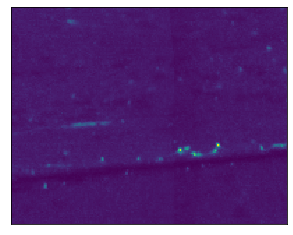

In [9]:
plot_image_2d(img[:,100,:])

In [22]:
s3_path = "s3://mouse-light-viz/precomputed_volumes/brain1_segments"
seg_id = 2
mip = 1
df = read_s3(s3_path, seg_id, mip)
df.head()

Downloading: 100%|██████████| 1/1 [00:00<00:00, 15.48it/s]


,sample,structure,x,y,z,r,parent
0,1,0,4713.0,4470.0,3857.0,1.0,-1
1,4,192,4721.0,4445.0,3849.0,1.0,1
2,7,64,4723.0,4446.0,3851.0,1.0,4
3,8,0,4728.0,4449.0,3852.0,1.0,7
4,14,0,4746.0,4445.0,3858.0,1.0,8


In [94]:
def change_x_dimension(x):
    fig, axes = plot_image_2d(img[x,:,:])
    axes.set_title('First Dimension')

def change_y_dimension(y):
    fig, axes = plot_image_2d(img[:,y,:])
    axes.set_title('Second Dimension')
    
def change_z_dimension(z):
    fig, axes = plot_image_2d(img[:,:,z])
    axes.set_title('Third Dimension')
    
interact(change_x_dimension, x=widgets.IntSlider(min=0,max=img.shape[0]-1,step=1,value=10))
interact(change_y_dimension, y=widgets.IntSlider(min=0,max=img.shape[1]-1,step=1,value=10))
interact(change_z_dimension, z=widgets.IntSlider(min=0,max=img.shape[2]-1,step=1,value=10))


interactive(children=(IntSlider(value=10, description='x', max=197), Output()), _dom_classes=('widget-interact…

interactive(children=(IntSlider(value=10, description='y', max=149), Output()), _dom_classes=('widget-interact…

interactive(children=(IntSlider(value=10, description='z', max=155), Output()), _dom_classes=('widget-interact…

<function __main__.change_z_dimension(z)>

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1512d7b90>)

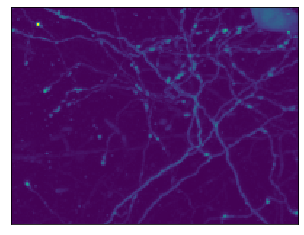

In [95]:
plot_image_mip(img)

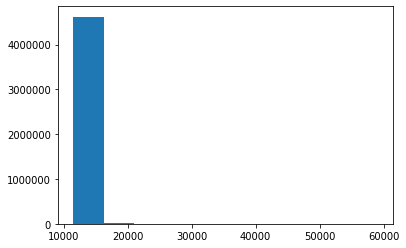

In [96]:
plot_image_hist(img)